In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from pywt import wavedec
import pywt

from calcula_descritores import calculate_statistics
from calcula_metricas import calculate_metrics

In [2]:
# Caminho relativo para o arquivo 'mat_vibration.mat'
caminho_arquivo = "C:\\Users\\Mathe\\projetos\\IC-ml-manutencao-preditiva-rolamentos-IFES\\Dados\\mat_classes.mat"

# Carregar o arquivo .mat
data = sio.loadmat(caminho_arquivo)

X = data['classes'][:, :2560]
y = data['classes'][:, 2560]

# Dividir o conjunto de dados em treino e teste (mantendo a mesma proporção de classes em ambos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

,Classe,Precision,Recall,Accuracy,Specificity,F1 Score
0,1,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,1.000000,1.000000,1.000000,1.000000,1.000000
2,3,0.931034,0.900000,0.983333,0.992593,0.915254
3,4,1.000000,1.000000,1.000000,1.000000,1.000000
4,5,0.967742,1.000000,0.996667,0.996296,0.983607
5,6,1.000000,0.966667,0.996667,1.000000,0.983051
6,7,0.903226,0.933333,0.983333,0.988889,0.918033
7,8,1.000000,1.000000,1.000000,1.000000,1.000000
8,9,0.903226,0.933333,0.983333,0.988889,0.918033
9,10,0.931034,0.900000,0.983333,0.992593,0.915254


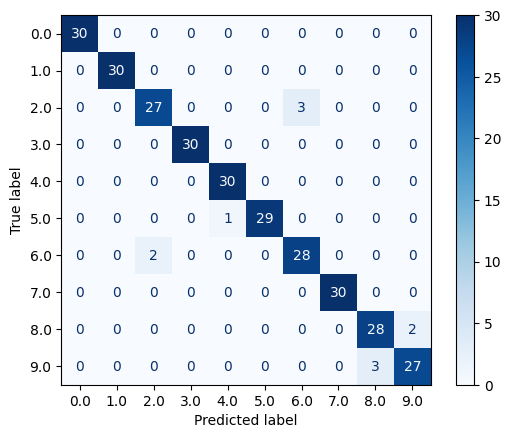

In [3]:
# Calcular os descritores estatísticos dos sinais de vibração do conjunto de treino e teste
descrX_train = calculate_statistics(X_train)
descrX_test = calculate_statistics(X_test)

# Treina Modelo de Árvore de Decisão
mdl_tree = DecisionTreeClassifier(max_depth=50, criterion='gini')
mdl_tree.fit(descrX_train, y_train)

# Realiza o teste
y_pred = mdl_tree.predict(descrX_test)

# Gera a matriz de confusão
mConf = confusion_matrix(y_test, y_pred)

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)

# Métricas de Desempenho
precision, recall, accuracy, specificity, f1score, df = calculate_metrics(cm)
df

,Classe,Precision,Recall,Accuracy,Specificity,F1 Score
0,1,1.000000,0.971429,0.996667,1.000000,0.985507
1,2,0.952381,1.000000,0.996667,0.996429,0.975610
2,3,1.000000,0.891892,0.986667,1.000000,0.942857
3,4,0.970588,0.970588,0.993333,0.996241,0.970588
4,5,0.920000,0.958333,0.990000,0.992754,0.938776
5,6,1.000000,0.969697,0.996667,1.000000,0.984615
6,7,0.882353,1.000000,0.986667,0.985185,0.937500
7,8,0.958333,1.000000,0.996667,0.996390,0.978723
8,9,0.812500,0.896552,0.970000,0.977860,0.852459
9,10,0.935484,0.828571,0.973333,0.992453,0.878788


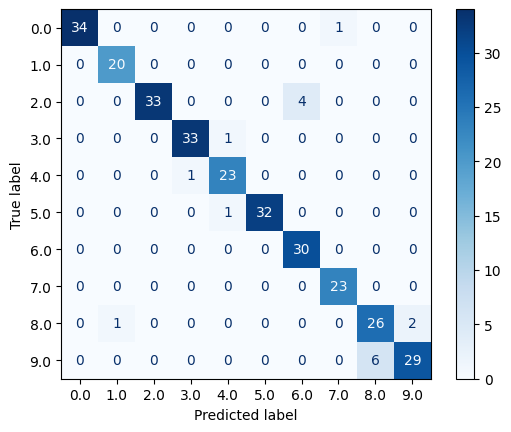

In [4]:
wavelet_name = 'db4'
level = 3

# Captura dimensões dos dados
n_samples, n_features = X.shape

# O level máximo de escalonamento que essa configuração de wavelet permite para os dados em questão
max_level = pywt.dwt_max_level(n_features, wavelet_name)

if level <= max_level:

    # Decompor os sinais usando a wavelet escolhida e o nível de decomposição
    mat_coeficientes_wavelet = []
    for i in range(n_samples):
        coeffs = pywt.wavedec(X[i, :], wavelet_name, level=level)  # Correção aqui
        flattened_coeffs = np.concatenate(coeffs)
        mat_coeficientes_wavelet.append(flattened_coeffs)
    arr_coeficientes_wavelet = np.array(mat_coeficientes_wavelet)

    # Dividir os dados em treinamento e teste (70% treinamento, 30% teste)
    X_train, X_test, y_train, y_test = train_test_split(arr_coeficientes_wavelet, y, test_size=0.3, random_state=42)

    # Calcular os descritores estatísticos dos sinais de vibração do conjunto de treino e teste
    descrX_train = calculate_statistics(X_train)
    descrX_test = calculate_statistics(X_test)

    # Treina Modelo de Árvore de Decisão
    mdl_tree = DecisionTreeClassifier(max_depth=50, criterion='gini')
    mdl_tree.fit(descrX_train, y_train)

    # Realiza o teste
    y_pred = mdl_tree.predict(descrX_test)
    
    # Gerar a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap=plt.cm.Blues)

    # Métricas de Desempenho
    precision, recall, accuracy, specificity, f1score, df = calculate_metrics(cm)
    df

else:
    print(f'O nível máximo de decomposição é {max_level}')

df